In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# para pintar
import pylab as plt
import seaborn as sns

# para que salga el grafico
%matplotlib inline


In [2]:
#Load data
data = pd.read_csv('../data/attacks_clean.csv', encoding = 'latin1')

In [3]:
### Analisis 1###  
###Donde muere mas gente en el mundo por ataque de tiburon

df_world = data[['country','fatal']].copy()

df_world['count'] = 1
df_world

df_world_pivot = pd.pivot_table(df_world, values='count', index='country', columns='fatal', aggfunc='count', 
                                fill_value=0).sort_values(by=['Y'],ascending=False)
df_world_pivot.head(10)

fatal,N,Y
country,,
AUSTRALIA,329,103
SOUTH AFRICA,201,45
USA,787,44
REUNION,15,7
PAPUA NEW GUINEA,11,7
CROATIA,1,6
MEXICO,11,6
NEW ZEALAND,28,5
NEW CALEDONIA,7,5


<AxesSubplot:xlabel='country'>

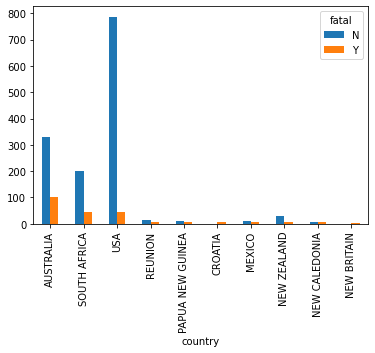

In [4]:
df_world_pivot.head(10).plot.bar()

In [5]:
### Analisis 2###  
###Especies de tiburon con mayor mortalidad en los paises con mas ataques

df_species = data[['country','species','fatal']].copy()
df_species.drop(df_species[(df_species.country != 'USA') & (df_species.country != 'AUSTRALIA') & (df_species.country != 'SOUTH AFRICA')].index, 
                axis=0, inplace=True)

df_species.drop(df_species[(df_species.fatal == 'N')].index, axis=0, inplace=True)

df_species['count'] = 1
df_species

df_species_pivot = pd.pivot_table(df_species, values='count', index='country', columns='species', aggfunc='count', fill_value=0)
df_species_pivot

species,blue,bull,tiger,unidentified species,whaler,white,zambesi
country,,,,,,,
AUSTRALIA,1,10,13,29,2,48,0
SOUTH AFRICA,0,1,6,7,0,29,2
USA,0,6,7,14,0,17,0


<AxesSubplot:xlabel='country'>

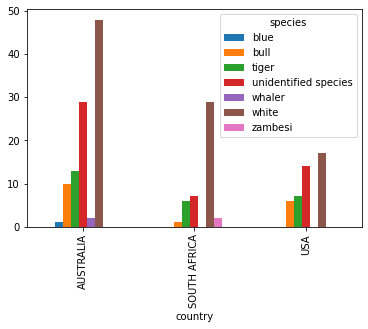

In [6]:
df_species_pivot.plot.bar()

In [7]:
### Analisis 3###  
###Analisis de muertes por tiburon por pais desde el 2000

df_decada = data[['country','year','fatal']].copy()
df_decada.drop(df_decada[(df_decada.country != 'USA') & (df_decada.country != 'AUSTRALIA') & (df_decada.country != 'SOUTH AFRICA')].index, 
                axis=0, inplace=True)

df_decada.drop(df_decada[(df_decada.fatal == 'N') | (df_decada.year < 2000)].index, axis=0, inplace=True)

df_decada['count'] = 1
df_decada_pivot = pd.pivot_table(df_decada, values='count', index='country', columns='year', aggfunc='count', fill_value=0, margins=True)
df_decada_pivot

year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,All
country,,,,,,,,,,,,,,,,,,,
AUSTRALIA,3,0,2,1,3,2,1,0,2,0,1,3,2,2,4,2,2,1,31
SOUTH AFRICA,0,0,0,2,2,1,0,1,0,2,2,2,3,1,1,0,0,0,17
USA,1,3,1,1,2,1,0,0,1,1,1,0,1,1,0,0,0,0,14
All,4,3,3,4,7,4,1,1,3,3,4,5,6,4,5,2,2,1,62


In [8]:
### Analisis 4###  
###Analisis por rangos de edad

df_age = data[['country','age','fatal']].copy()
df_age.drop(df_age[(df_age.country != 'USA') & (df_age.country != 'AUSTRALIA') & (df_age.country != 'SOUTH AFRICA')].index, 
                axis=0, inplace=True)

df_age.drop(df_age[(df_age.fatal == 'N')].index, axis=0, inplace=True)


df_age.loc[(df_age.age <= 12),  'agegroup'] = 'Kid'
df_age.loc[(df_age.age  > 12) & (df_age.age  <=18),  'agegroup'] = 'Teens'
df_age.loc[(df_age.age > 18) & (df_age.age  <=30),  'agegroup'] = 'Young adults'
df_age.loc[(df_age.age > 30) & (df_age.age  <=65),  'agegroup'] = 'Adults'
df_age.loc[(df_age.age > 65),  'agegroup'] = 'Seniors'


df_age['count'] = 1
df_age_pivot = pd.pivot_table(df_age, values='count', index='country', columns='agegroup', aggfunc='count', fill_value=0)
df_age_pivot


agegroup,Adults,Kid,Seniors,Teens,Young adults
country,,,,,
AUSTRALIA,31,2,1,31,38
SOUTH AFRICA,4,0,3,11,27
USA,14,3,2,10,15


<AxesSubplot:xlabel='country'>

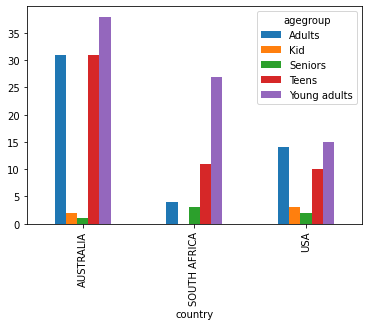

In [9]:
df_age_pivot.plot.bar()